In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

# 读取数据集
train_data = pd.read_csv('Titanic_dataset/train.csv')
test_data = pd.read_csv('Titanic_dataset/test.csv')



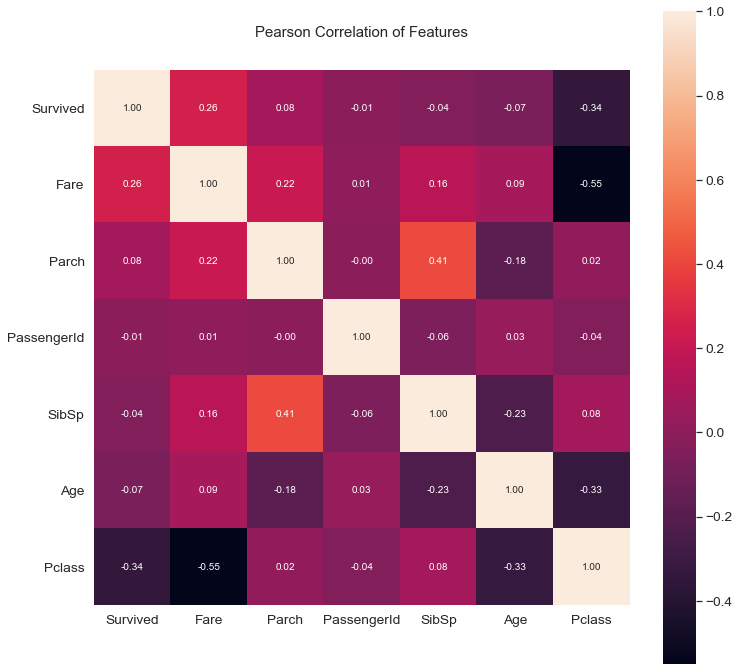

In [15]:
# 相關性矩陣
import matplotlib.pyplot as plt
import seaborn as sns

# 使用平均年龄来填充年龄中的nan值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)


#画纸大小
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
corrmat = train_data.corr()
k = 7
# nlargest(n,df) 找出集合中最大的N个数
cols = corrmat.nlargest(k,'Survived')['Survived'].index  #取出与Survived相关性最大的七项
cm = np.corrcoef(train_data[cols].values.T)  #相关系数 
#front_sacle:字体，浮点数
sns.set(font_scale = 1.25)
# obar:描述是否绘制颜色条.
# annot:如果为 True，则在每个热力图单元格中写入数据值。
# annot_kws:字典或者键值对，可选参数。当annot为 True 时，ax.text的关键字参数。
# square:如果为 True，则将坐标轴方向设置为“equal”，以使每个单元格为方形。
# fmt:添加注释时要使用的字符串格式代码。
# xticklabels, yticklabels:如果为 True，则绘制数据框的列名称。
#如果为 False，则不绘制列名称。如果是列表，则将这些替代标签绘制为 xticklabels。
#如果是整数，则使用列名称，但仅绘制每个 n 标签。如果是“auto”，将尝试密集绘制不重叠的标签。
hm = sns.heatmap(cm,cbar = True,annot = True,square = True ,fmt = '.2f',
annot_kws = {'size': 10},yticklabels = cols.values,xticklabels = cols.values)

In [17]:
# 选择用于训练的特征
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x_train = train_data[features]
x_test = test_data[features]

y_train = train_data['Survived']

In [19]:
# 检查缺失值
print ('训练数据信息：')
x_train.info()
print ('-'*30)
print ('测试数据信息：')
x_test.info()

训练数据信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB
------------------------------
测试数据信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 

In [20]:
# 使用登录最多的港口来填充登录港口的nan值
print ('\n\n\n登录港口信息：')
print (x_train['Embarked'].value_counts())
x_train['Embarked'].fillna('S', inplace=True)
x_test['Embarked'].fillna('S', inplace=True)




登录港口信息：
S    644
C    168
Q     77
Name: Embarked, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [21]:
# 使用平均年龄来填充年龄中的nan值
x_train['Age'].fillna(x_train['Age'].mean(), inplace=True)
x_test['Age'].fillna(x_test['Age'].mean(), inplace=True)

# 使用票价的均值填充票价中的nan值
x_test['Fare'].fillna(x_test['Fare'].mean(), inplace=True)

In [22]:
# 将特征值转换成特征向量
dvec = DictVectorizer(sparse=False)

x_train = dvec.fit_transform(x_train.to_dict(orient='record'))
x_test = dvec.transform(x_test.to_dict(orient='record'))

# 打印特征向量格式
print ('\n\n\n特征向量格式')
print (dvec.feature_names_)




特征向量格式
['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


In [24]:
# 支持向量机
svc = SVC(C=1.0,kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=True)


print ('\n\n\n模型验证:')
print ('SVM acc is', np.mean(cross_val_score(svc, x_train, y_train, cv=10)))




模型验证:
SVM acc is 0.7284769038701622
